In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
# Load the Iris dataset
data = pd.read_csv('Iris.csv')

In [3]:
# Drop the 'Id' column if present
if 'Id' in data.columns:
    data = data.drop(columns=['Id'])


In [4]:
# Define features and target
X = data.drop(columns=['Species'])
y = data['Species']

In [5]:
# Function to plot clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=100, alpha=0.6)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [6]:
# Function to determine optimal clusters using Elbow Method
def elbow_method(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, 'bo-')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()


In [7]:
# Function to determine optimal clusters using Silhouette Score
def silhouette_analysis(X):
    silhouette_scores = []
    for n_clusters in range(2, 11):
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        preds = clusterer.fit_predict(X)
        score = silhouette_score(X, preds)
        silhouette_scores.append(score)
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, 11), silhouette_scores, 'bo-')
    plt.title('Silhouette Analysis')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()


In [8]:
# Function to plot dendrogram
def plot_dendrogram(X):
    plt.figure(figsize=(8, 5))
    linked = linkage(X, 'ward')
    dendrogram(linked, truncate_mode='level', p=5)
    plt.title('Dendrogram')
    plt.show()

In [9]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

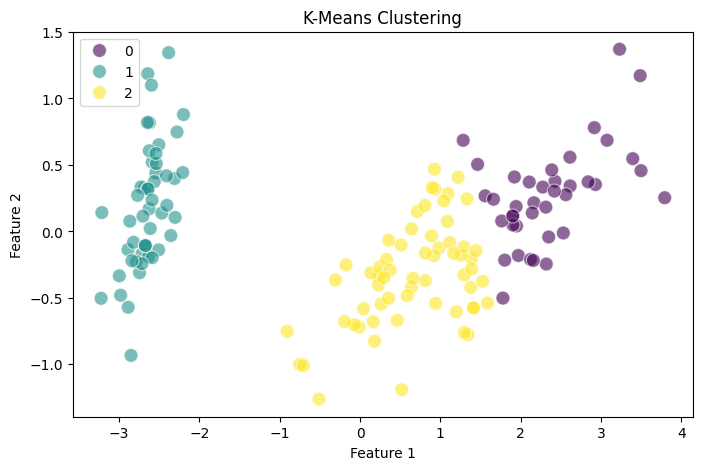

In [10]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
plot_clusters(X_pca, kmeans_labels, "K-Means Clustering")

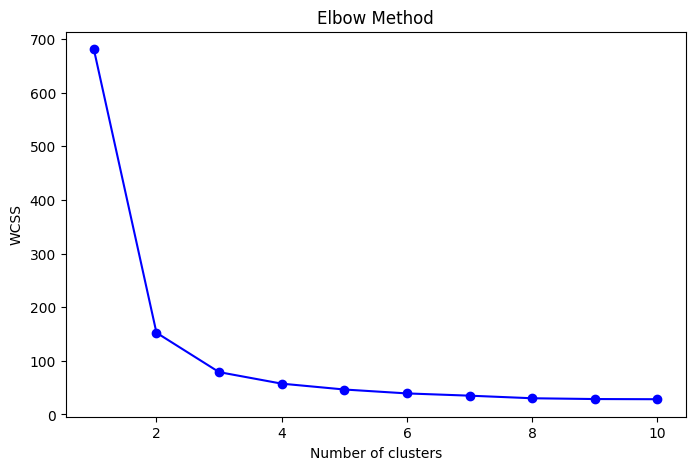

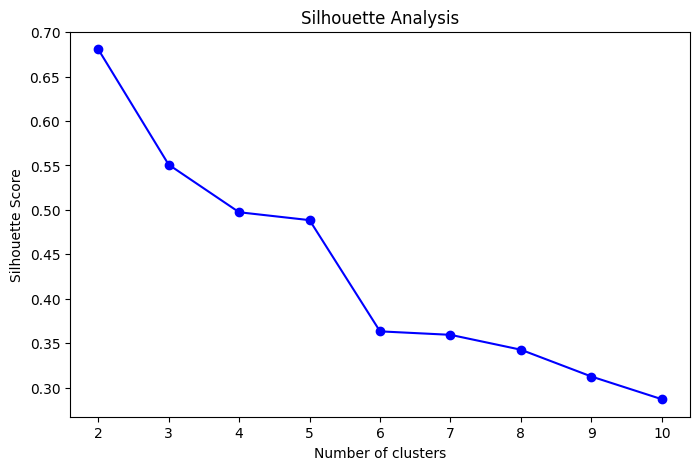

In [11]:
# Optimal Number of Clusters
elbow_method(X)
silhouette_analysis(X)

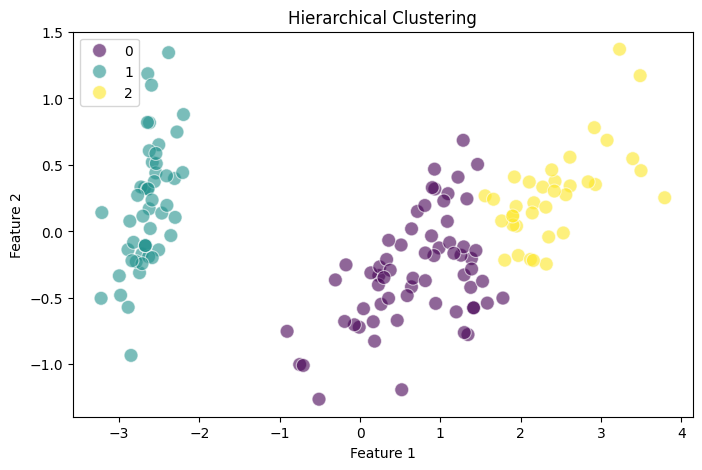

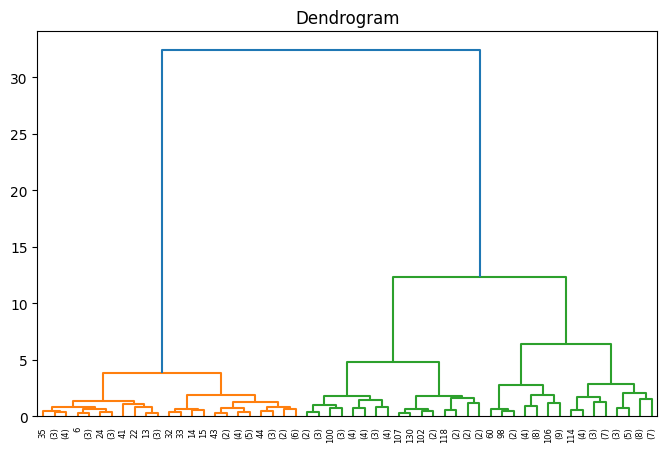

In [12]:
# Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(X)
plot_clusters(X_pca, agg_labels, "Hierarchical Clustering")
plot_dendrogram(X)

In [13]:
# Comparing Clustering Methods
def compare_clustering_methods(X, y):
    km_model = KMeans(n_clusters=3, random_state=42)
    km_labels = km_model.fit_predict(X)
    km_score = silhouette_score(X, km_labels)
    
    ag_model = AgglomerativeClustering(n_clusters=3)
    ag_labels = ag_model.fit_predict(X)
    ag_score = silhouette_score(X, ag_labels)
    
    print("### Clustering Performance Comparison")
    print(f"K-Means Silhouette Score: {km_score:.2f}")
    print(f"Hierarchical Clustering Silhouette Score: {ag_score:.2f}")

compare_clustering_methods(X, y)

### Clustering Performance Comparison
K-Means Silhouette Score: 0.55
Hierarchical Clustering Silhouette Score: 0.55
